### General Instructions: 
- Due Date: Friday Feb 14, 5 PM 
- Submission: Please work on this Notebook and leave it in your account on the server. We have a crontab job which will copy your submission Notebook from your account at sharp 5 PM on Friday, Feb 14. Any changes made to Notebook after 5 PM, Friday, Feb 14 will not be reflected in the submitted assignment. DO NOT change the name or location of this file on the server.
- __Plagiarism will not be tolerated in any form. Zero points will be awarded for the entire assignment in such cases__.

In [1]:
Question 1:
Total: 30 points
Topic: Pressure and Bulk Modulus from Energies

Reference: In lecture-4, we implemented Python code to calculate the energy of LJ FCC-solid [Notebook Name: 9_LJRelaxedLatticeConstant.ipynb]. We used this function to calculate the energy of solid for different lattice constants and used Energy vs lattice ocnstant to identify the relaxed lattice constant of the solid.
- (a) [10 points] Use 50 values of lattice constants between 5.1 and 5.4 Angstrom [both inclusive] and calculate the energy corresponding to these lattice constants. Using numpy, fit a cubic polynomial to crystal-volume (from lattice-constant) and energy data that you obtained in part (a). [Hint: look into numpy function polyfit]
- (b) [10 points] The pressure is defined as P = -dE/dV at constant temperature. Use numpy function polyder to calculate the pressure at each of the lattice constant of part(a).
- (c) [10 points] The bulk modulus can be obtained as B = V*(d2E/dV2) at the relaxed volume. Using numpy,polyfit, numpy.polyder, and numpy.polyval, evaluate the Buld Modulus of FCC-Ar.

- For part(a), print the output in a tabular format with col-1 being the lattice constant (in Angstrom) and col-2 being the corresponding energy (in eV)
- For part(b), print data in tabular format with col-1 being the lattice constant (in Angstrom) and col-2 being the pressure (in GPa).
- For part(c), print the Bulk modulus in GPa.

For your convinience, the code to calculate the energy of LJ FCC Ar for given epsilon, sigma, and cutoff is included in the module mywrapper. You can call this function as: 

import mywrapper
epsilon = 1.67e-21
sigma = 3.4e-10
cutoff = 3.5*sigma
alat = 5.0e-10
energy = mywrapper.get_LJEnergy(alat, epsilon, sigma, cutoff)

Note that the units for length and energy scale in the above function are Meter and Joule.

SyntaxError: invalid syntax (<ipython-input-1-a9665b123072>, line 1)

In [2]:
# Answer 1:

import mywrapper

epsilon = 1.67e-21
sigma = 3.4e-10
cutoff = 3.5*sigma

energy = mywrapper.get_LJEnergy(5.0e-10, epsilon, sigma, cutoff)
print(energy)

-1.2612907560695753e-20



Lattice Constant(A) | Energy (eV)
5.100000 | -0.085760
5.106122 | -0.086034
5.112245 | -0.086294
5.118367 | -0.086539
5.124490 | -0.086769
5.130612 | -0.086986
5.136735 | -0.087189
5.142857 | -0.087378
5.148980 | -0.087554
5.155102 | -0.087718
5.161224 | -0.087869
5.167347 | -0.088008
5.173469 | -0.088136
5.179592 | -0.088251
5.185714 | -0.088355
5.191837 | -0.088448
5.197959 | -0.088531
5.204082 | -0.088603
5.210204 | -0.088664
5.216327 | -0.088715
5.222449 | -0.088757
5.228571 | -0.088789
5.234694 | -0.088811
5.240816 | -0.088825
5.246939 | -0.088829
5.253061 | -0.088825
5.259184 | -0.088812
5.265306 | -0.088791
5.271429 | -0.088762
5.277551 | -0.088725
5.283673 | -0.088680
5.289796 | -0.088628
5.295918 | -0.088569
5.302041 | -0.088502
5.308163 | -0.088428
5.314286 | -0.088348
5.320408 | -0.088261
5.326531 | -0.088167
5.332653 | -0.088068
5.338776 | -0.087962
5.344898 | -0.087850
5.351020 | -0.087732
5.357143 | -0.087609
5.363265 | -0.087480
5.369388 | -0.087346
5.375510 | -0.087207

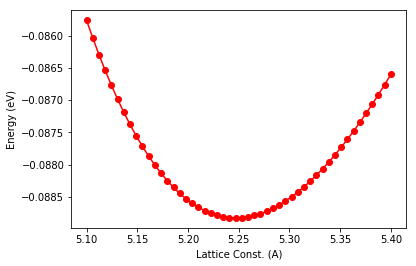

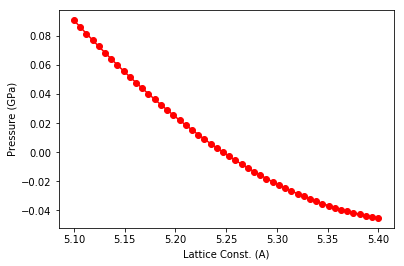

In [3]:
import mywrapper
import numpy

# part(a)
alat = numpy.linspace(5.1,5.4,50)
energies = []
volumes = []
for a in alat:
    energies.append(mywrapper.get_LJEnergy(a*1e-10, epsilon, sigma, cutoff))
    volumes.append((a*1e-10)**3)
    
volumes = numpy.array(volumes)*1e+30
energies = numpy.array(energies)/(1.6e-19)
coeff = numpy.polyfit(volumes, energies, 3)

print("\nLattice Constant(A) | Energy (eV)")
for a,e in zip(alat, energies):
    print("%f | %f" % (a,e))

# part(b)
# get pressure
press_coeff = numpy.polyder(coeff)
pressure = -numpy.polyval(press_coeff, volumes)

import ase.units
pressure = numpy.array(pressure)/ase.units.GPa

print("\nLattice Constant(A) | Pressure (GPa)")
for a,p in zip(alat, pressure):
    print("%f | %f" % (a,p))

from matplotlib import pyplot as plt
plt.figure(0)
plt.plot(alat, energies, 'ro-')
plt.xlabel("Lattice Const. (A)") 
plt.ylabel("Energy (eV)")
plt.figure(1)
plt.plot(alat, pressure, 'ro-')
plt.xlabel("Lattice Const. (A)") 
plt.ylabel("Pressure (GPa)")


# part(c)
# get bulk modulus
bulk_coeff = numpy.polyder(press_coeff)
relax_vol = volumes[numpy.argmin(energies)]
bulk_modulus = relax_vol*numpy.polyval(bulk_coeff,relax_vol)
print("The bulk modulus value (in GPa) ", bulk_modulus/ase.units.GPa)

In [5]:
import os
import numpy
import ase
import ase.io
import ase.build
import ase.visualize

In [ ]:
Pb = ase.Atom(position=(0.5,0.5,0.5), symbol='Pb')
O1 = ase.Atom(position=(0.5, 0.5, 0.0), symbol='O')
O2 = ase.Atom(position=(0.5, 0.0, 0.5), symbol='O')
O3 = ase.Atom(position=(0.0, 0.5, 0.5), symbol='O')
Ti = ase.Atom(position=(0.0, 0.0, 0.0), symbol='Ti')
atoms = ase.Atoms((Pb, O1, O2, O3, Ti), cell=[1.0,1.0,1.0])
cell = atoms.get_cell()
cell *= 5.0                               # set the lattice constant
atoms.set_cell(cell, scale_atoms=True)    # scale atoms

atoms *= (4,4,4)
pos = atoms.get_positions()
for p in pos:
    for i in range(3):
        p[i] += (numpy.random.randint(0,100)/100.)*0.5
atoms.set_positions(pos)
ase.io.write('perturbed_supercell_PbTiO3_POSCAR', atoms, format='vasp')

In [7]:
# read the structure
atoms = ase.io.read('perturbed_supercell_PbTiO3_POSCAR', format='vasp')
    
'''
..............
write your code here
'atoms' (atomic-object) will be modified here
..............
'''
    
# get Pb-atom indices
Pb_indices = [atom.index for atom in atoms if atom.symbol=="Pb"]
Pb_index = Pb_indices[numpy.random.randint(0,len(Pb_indices))]
    
scaled_positions = atoms.get_scaled_positions()
positions = atoms.get_positions()
symbols = atoms.get_chemical_symbols()
alat = atoms.get_cell()
    
neighbor_index = -1
neighbor_dist = 1e+6
for i in range(len(positions)):
    
    # loop over only Ti atoms
    if symbols[i] != 'Ti':
        continue

    # we need to check only periodic images of this Ti atom as well
    for n1 in range(-1,2):
        for n2 in range(-1,2):
            for n3 in range(-1,2):
                
                # get direct and cart coord of image
                dir_image = numpy.array([n1,n2,n3]) + scaled_positions[i]
                cart_image = numpy.matmul(dir_image, alat)
                
                # get distance from Pb atom
                dist_image = numpy.sum((positions[Pb_index] - cart_image)**2)
                dist_image = numpy.sqrt(dist_image)
                
                # check if this is nearest
                if dist_image < neighbor_dist:
                    neighbor_dist = dist_image
                    neighbor_index = i
  
symbols[Pb_index] = 'Ti'
symbols[neighbor_index] = 'Pb'
atoms.set_chemical_symbols(symbols)                   

ase.visualize.view(atoms)
    
# save the structure
# write the final atomic structure 'atoms' to file
ase.io.write('antisite_defect_POSCAR', atoms, format='vasp')

In [7]:
a = 3.6
cell = [[a,0,0], [0,a,0], [0,0,a]]
atoms = ase.Atoms([ase.Atom('Cu', [0.0,0.0,0.0]), 
                    ase.Atom('Cu', [0.5*a, 0.5*a, 0.0*a]),
                    ase.Atom('Cu', [0.5*a, 0.0*a, 0.5*a]),
                    ase.Atom('Cu', [0.0*a, 0.5*a, 0.5*a]),])
atoms.set_cell(cell)
natom = len(atoms.get_positions())

# cut the surface
surface = ase.build.surface(atoms, [1,1,1], layers=4, vacuum=15)
surface *= (2,2,1)
ase.visualize.view(surface)

# sort atoms as per the z-coord
z_coord = [atom.position[2] for atom in surface]
surface = ase.build.sort(surface, tags=z_coord)
ase.visualize.view(surface)

# fix bottom two layers -> first 32 atoms
constraint = ase.constraints.FixAtoms(indices=[i for i in range(32)])
surface.set_constraint(constraint)
ase.visualize.view(surface)

ase.io.write('reference_surface_POSCAR', surface, format='vasp')